#Exploração e análise de dados de crédito com SQL

Os dados representam informações de clientes de um banco e contêm as seguintes colunas:

* idade = idade do cliente

* sexo = sexo do cliente (M ou F)

* dependentes = número de dependentes do cliente

* escolaridade = nível de escolaridade dos clientes

* estado_civil = estado civil do cliente

* salario_anual = faixa salarial do cliente

* tipo_cartao = tipo de cartão do cliente

* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

* iteracoes_12m = quantidade de iterações feitas nos últimos 12 meses

* meses_inativo_12m = quantidade de meses que o cliente ficou inativo

* limite_credito = limite de crédito do cliente

* valor_transacoes_12m = valor das transações nos últimos 12 meses

* qtd_transacoes_12m = quantidade de transações dos últimos 12 meses

A tabela de SQL foi criada usando o AWS Athena através de um arquivo colocado em um Bucket S3.

## **1. Criação da tabela e algumas queries:**

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://ebac-gustavocamargo-modulo-36'
TBLPROPERTIES ('has_encrypted_data'='false');
```


```sql
select * from credito limit 10;
```
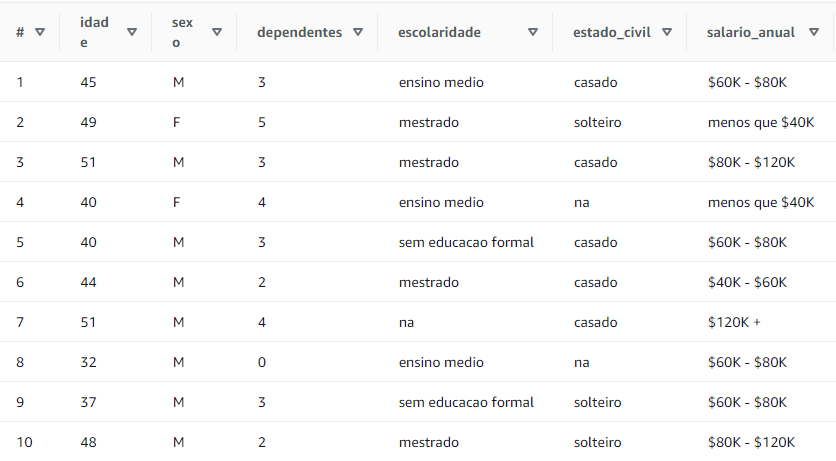

```sql
select count(*) from credito
```
R: 2564

```sql
DESCRIBE credito
```
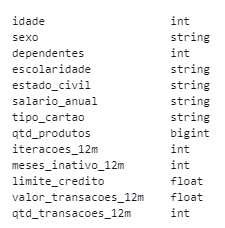

## **2. Análise Exploratória de Dados:**

### 2.1 - Explorando Dados de Refêrencia:

Entender qual é o nível de escolaridade do grupo:

```sql
SELECT DISTINCT escolaridade FROM credito
```
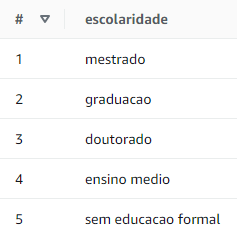

Entender o estado civil do grupo:

```sql
SELECT DISTINCT estado_civil FROM credito;
```
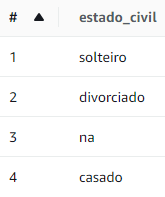

Entender a faixa salarial:

```sql
SELECT DISTINCT salario_anual FROM credito;
```
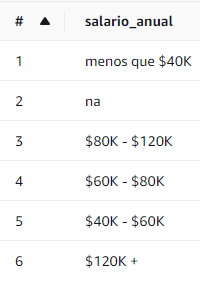

### 2.2 - Análise Combinada dos Dados:

Definido genero majoritário da base da pesquisa:

```sql
SELECT COUNT(*) AS qtde, sexo FROM credito GROUP BY sexo
```
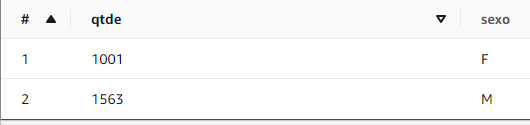

Distribuição de entrevistados pela faixa de renda:

```sql
SELECT COUNT(*) AS qtde, salario_anual FROM credito GROUP BY salario_anual ORDER BY qtde ASC;
```
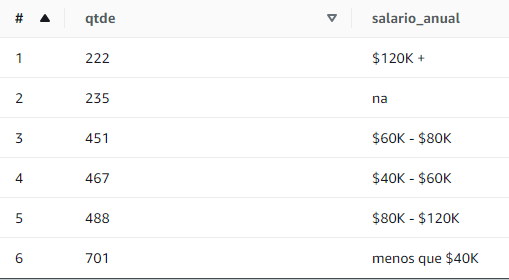




Distribuição de idade por cliente:

```sql
SELECT AVG(idade) AS media_idade, MIN (idade) AS min_idade, MAX(idade) AS  max_idade, sexo FROM credito GROUP BY sexo
```
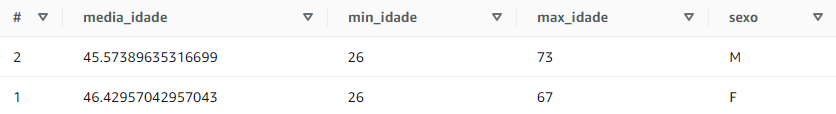

Quantidade de clientes por estado civil:

```sql
SELECT COUNT(*) AS qtd, estado_civil FROM credito GROUP BY estado_civil ORDER BY qtd DESC
```
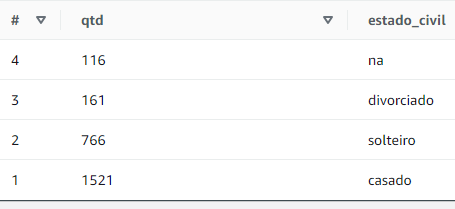

Efeito do sexo e faixa salarial sobre o limite de crédito e valor de transações:

```sql
SELECT AVG(valor_transacoes_12m) AS media_valor_transacoes, AVG (limite_credito) AS media_limite, sexo, salario_anual FROM credito WHERE salario_anual != 'na'GROUP BY sexo, salario_anual ORDER BY media_valor_transacoes DESC;
```
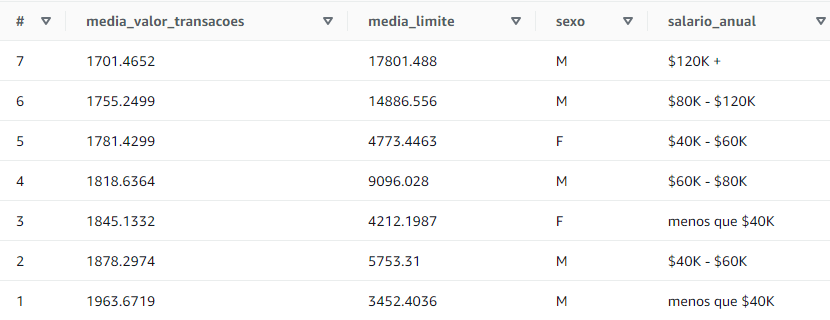

## **3. Conclusões**

Com base nas análises realizadas, é possível discernir algumas informações valiosas:

* A maioria dos registros na base de dados corresponde a clientes do sexo masculino.
* As idades dos clientes são semelhantes, tanto para homens quanto para mulheres.
* O maior contingente de clientes tem renda anual na faixa mais baixa, ou seja, menos de 40 mil, enquanto uma minoria auferi renda na faixa mais alta de 120 mil ou mais.
* Os clientes do sexo masculino têm os limites de crédito mais elevados, mas a escolaridade ou o tipo de cartão não parecem influenciar significativamente esses limites.
* Não há clientes do sexo feminino com renda anual superior a $60 mil.
A maioria dos clientes é casada, e, em média, os casados têm os limites de crédito mais baixos e efetuam gastos menores em transações.